In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_excel("Data_Train.xlsx")
pd.set_option('display.max_columns',None)
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train.shape

(10683, 11)

In [5]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train.dropna(inplace=True)

In [7]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train["J_day"]=pd.to_datetime(train["Date_of_Journey"]).dt.day
train["J_month"]=pd.to_datetime(train["Date_of_Journey"]).dt.month
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_day,J_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [9]:
train.drop(["Date_of_Journey"], axis=1, inplace=True)

In [10]:
train['D_hour']=pd.to_datetime(train["Dep_Time"]).dt.hour
train["D_min"]=pd.to_datetime(train["Dep_Time"]).dt.minute
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_day,J_month,D_hour,D_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [11]:
train.drop(["Dep_Time"], axis=1, inplace=True)

In [12]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,J_day,J_month,D_hour,D_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [13]:
train["A_hour"]=pd.to_datetime(train["Arrival_Time"]).dt.hour
train["A_min"]=pd.to_datetime(train["Arrival_Time"]).dt.minute
train.drop(["Arrival_Time"], axis=1, inplace=True)
train.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,J_day,J_month,D_hour,D_min,A_hour,A_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [14]:
duration=list(train["Duration"])
for index in range(len(duration)):
  if len(duration[index].split())!=2:
    if "h" in duration[index]:
      duration[index]=duration[index].strip()+" 0m"
    else:
      duration[index]="0h "+duration[index]

d_hour=[]
d_min=[]
for i in range(len(duration)):
  d_hour.append(int(duration[i].split(sep="h")[0]))
  d_min.append(int(duration[i].split(sep="m")[0].split()[-1])) #logic 9h 12m--> "9h 12", "m"-->"9h" "12"--->"12"---->12


In [15]:
train['Dur_hour']=d_hour
train['Dur_mins']=d_min
train.drop(["Duration"], axis=1, inplace=True)
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,J_day,J_month,D_hour,D_min,A_hour,A_min,Dur_hour,Dur_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


# Missing Key
Handling Categorical Data

Nominal data--->data not in any order-One hot encoder  is used 


Ordinal data--->Data are in order-->Label  Encoder is used

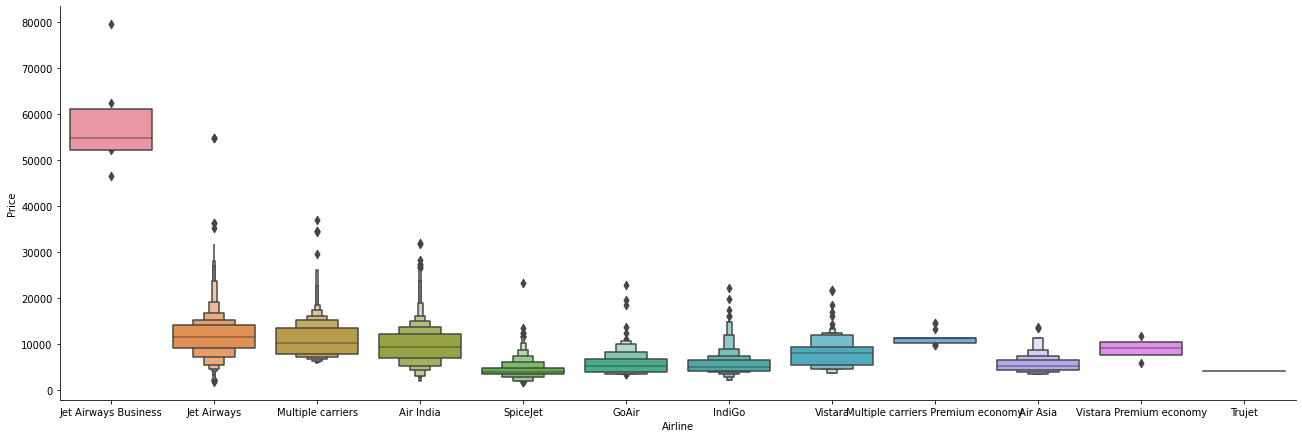

In [16]:
#to know outliers
sns.catplot(y="Price", x="Airline", data=train.sort_values("Price",ascending=False), kind="boxen",height=6,aspect=3)
plt.show()

In [17]:
Airline=train[["Airline"]]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [18]:
train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

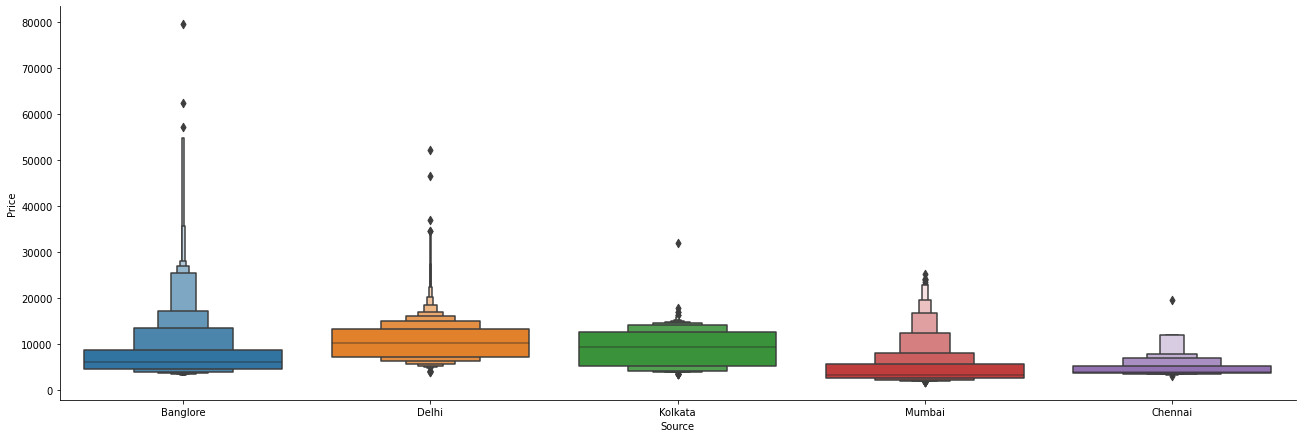

In [19]:
#to know outliers
sns.catplot(y="Price", x="Source", data=train.sort_values("Price",ascending=False), kind="boxen",height=6,aspect=3)
plt.show()

In [20]:
source=train[["Source"]]
source=pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [21]:
destination=train[["Destination"]]
des=pd.get_dummies(destination,drop_first=True)
des.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [22]:
#route needs to drop as same thing is been represented by total_stops
#Additional contains no information so needs to droped down
train.drop(["Route","Additional_Info"], axis=1, inplace=True)

In [23]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [24]:
train["Total_Stops"].replace({'1 stop':1,'non-stop':0, '2 stops':2, '3 stops':3, '4 stops':4 },inplace=True)

In [25]:
data_train=pd.concat([train,Airline,source,des], axis=1)

In [26]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,J_day,J_month,D_hour,D_min,A_hour,A_min,Dur_hour,Dur_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
data_train.drop(['Airline','Source',"Destination"],axis=1,inplace=True)

In [28]:
data_train.head()

,Total_Stops,Price,J_day,J_month,D_hour,D_min,A_hour,A_min,Dur_hour,Dur_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


We have performed steps of preprocessing on test data and training data differently so that we can avoid data leakage

In [29]:
test=pd.read_excel("Test_set.xlsx")
pd.set_option('display.max_columns',None)
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [30]:
test.isna().sum()
test.dropna(inplace=True)

In [31]:
test["J_day"]=pd.to_datetime(test["Date_of_Journey"]).dt.day
test["J_month"]=pd.to_datetime(test["Date_of_Journey"]).dt.month
test.drop(["Date_of_Journey"], axis=1, inplace=True)
test["A_hour"]=pd.to_datetime(test["Arrival_Time"]).dt.hour
test["A_min"]=pd.to_datetime(test["Arrival_Time"]).dt.minute
test.drop(["Arrival_Time"], axis=1, inplace=True)
test['D_hour']=pd.to_datetime(test["Dep_Time"]).dt.hour
train["D_min"]=pd.to_datetime(test["Dep_Time"]).dt.minute
test.drop(["Dep_Time"], axis=1, inplace=True)
duration=list(test["Duration"])
for index in range(len(duration)):
  if len(duration[index].split())!=2:
    if "h" in duration[index]:
      duration[index]=duration[index].strip()+" 0m"
    else:
      duration[index]="0h "+duration[index]

d_hour=[]
d_min=[]
for i in range(len(duration)):
  d_hour.append(int(duration[i].split(sep="h")[0]))
  d_min.append(int(duration[i].split(sep="m")[0].split()[-1])) #logic 9h 12m--> "9h 12", "m"-->"9h" "12"--->"12"---->12

test['Dur_hour']=d_hour
test['Dur_mins']=d_min
test.drop(["Duration"], axis=1, inplace=True)
Airline=test[["Airline"]]
Airline=test[["Airline"]]
source=test[["Source"]]
source=pd.get_dummies(source,drop_first=True)
test.drop(["Route","Additional_Info"], axis=1, inplace=True)
test["Total_Stops"].replace({'1 stop':1,'non-stop':0, '2 stops':2, '3 stops':3, '4 stops':4 },inplace=True)
data_test=pd.concat([test,Airline,source,des], axis=1)
data_test.drop(['Airline','Source',"Destination"],axis=1,inplace=True)

In [32]:
data_test.head()

,Total_Stops,J_day,J_month,A_hour,A_min,D_hour,Dur_hour,Dur_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,6.0,6.0,4.0,25.0,17.0,10.0,55.0,0.0,1.0,0.0,0.0,0,0,0,0,1
1,1.0,5.0,12.0,10.0,20.0,6.0,4.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0
2,1.0,21.0,5.0,19.0,0.0,19.0,23.0,45.0,0.0,1.0,0.0,0.0,1,0,0,0,0
3,1.0,21.0,5.0,21.0,0.0,8.0,13.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0
4,0.0,24.0,6.0,2.0,45.0,23.0,2.0,50.0,0.0,0.0,0.0,0.0,0,0,0,0,1


Feature Selection
Finding out the best feature which will contribute and have good relation with target variable

1) heatmap

2)feature_importance_

3)selectKBest

In [33]:
data_train.columns

Index(['Total_Stops', 'Price', 'J_day', 'J_month', 'D_hour', 'D_min', 'A_hour',
       'A_min', 'Dur_hour', 'Dur_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [34]:
x=data_train.loc[:,['Total_Stops', 'J_day', 'J_month', 'D_hour', 'D_min', 'A_hour',
       'A_min', 'Dur_hour', 'Dur_mins', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,J_day,J_month,D_hour,D_min,A_hour,A_min,Dur_hour,Dur_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
y=data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

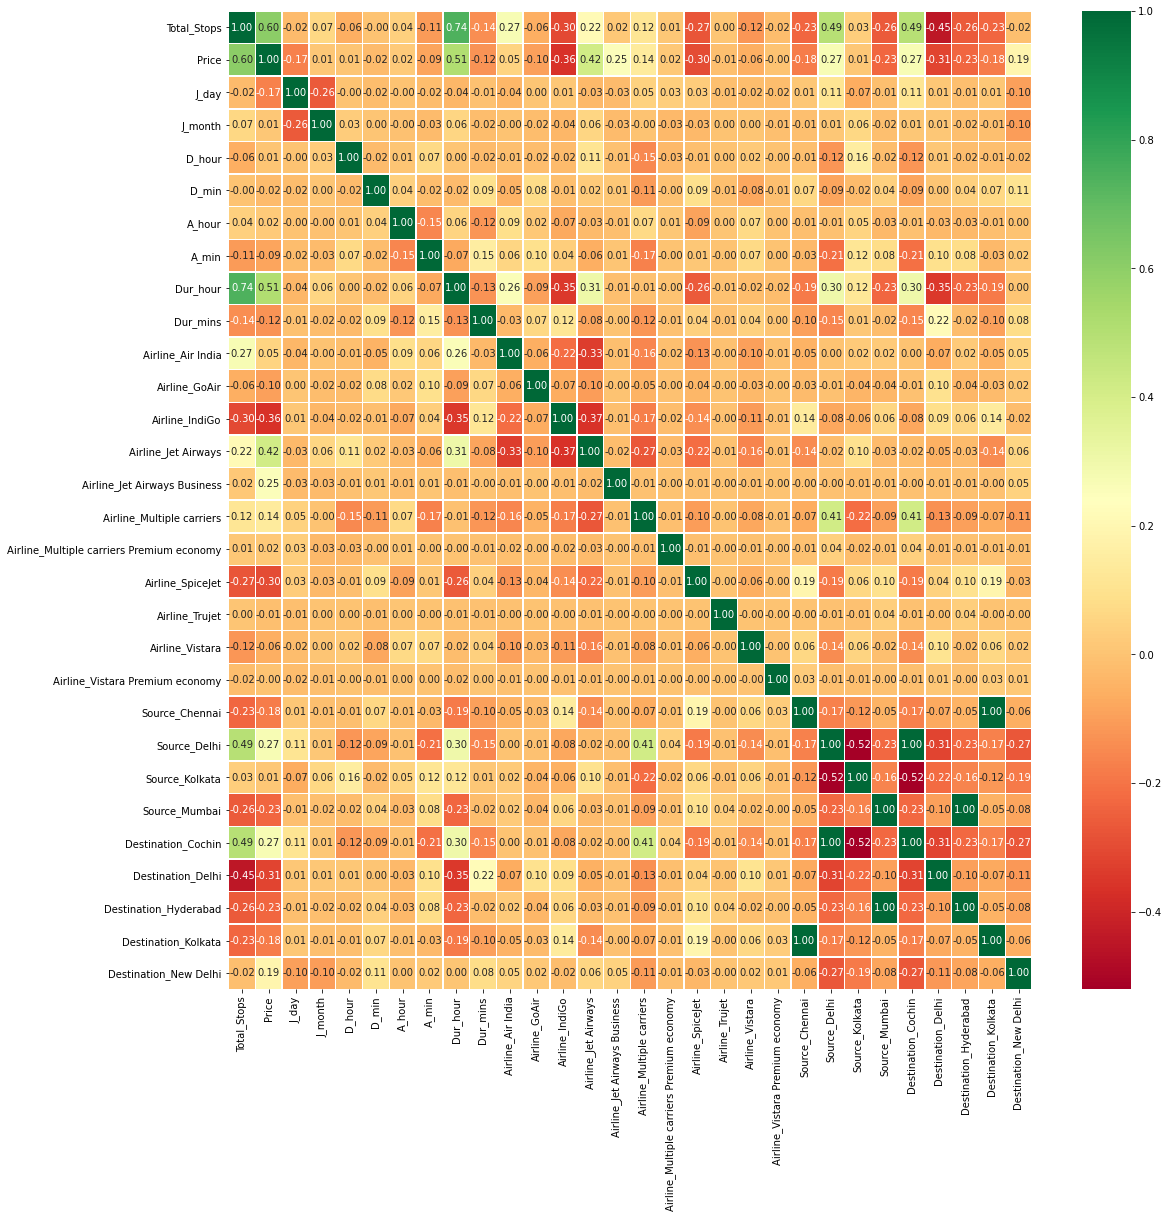

In [36]:
cor_matrix=data_train.corr()
plt.figure(figsize=(18,18))
ax=sns.heatmap(cor_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f",
               cmap="RdYlGn")


In [37]:
#important features using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [38]:
print(model.feature_importances_)

[2.34826864e-01 1.05298059e-01 8.75434512e-02 2.57393438e-02
 2.19641762e-02 2.90557448e-02 2.01764558e-02 1.17664278e-01
 1.85353627e-02 1.03935253e-02 1.93450870e-03 1.99527993e-02
 1.35249610e-01 6.70309083e-02 1.73245246e-02 9.39802218e-04
 3.89173516e-03 1.20133007e-04 5.01850638e-03 1.41336673e-04
 4.93036239e-04 1.12410466e-02 4.13696771e-03 6.28629760e-03
 1.10241259e-02 1.41763835e-02 5.56967852e-03 5.91190628e-04
 2.36801491e-02]


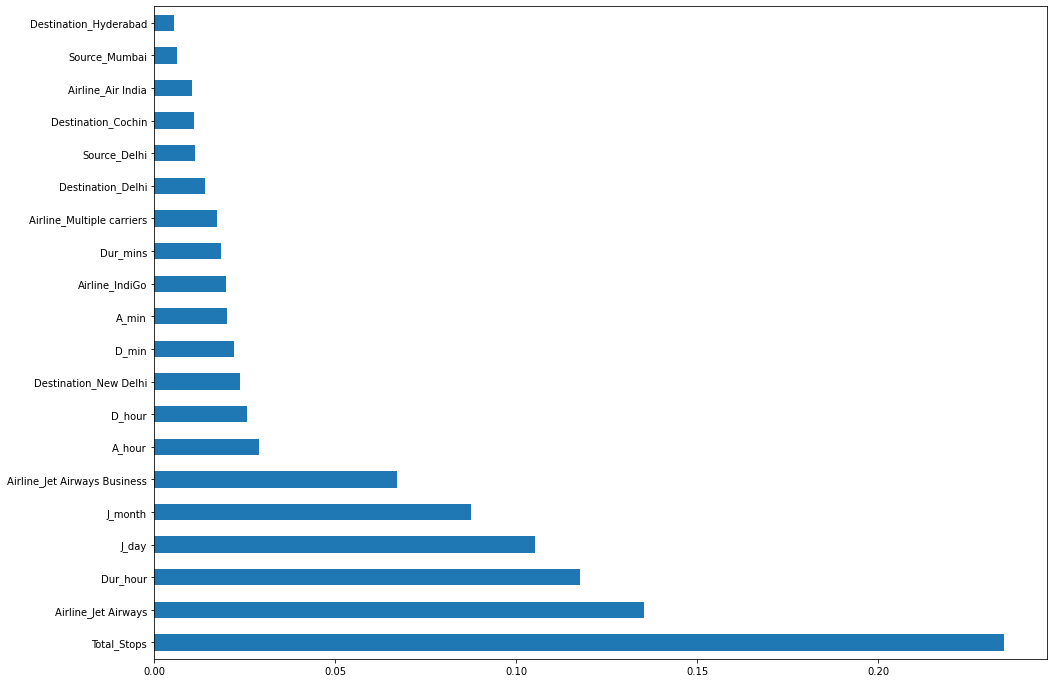

In [39]:
plt.figure(figsize=(16,12))
importance=pd.Series(model.feature_importances_,index=x.columns)
importance.nlargest(20).plot(kind='barh')
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
y_pred=reg_rf.predict(x_test)

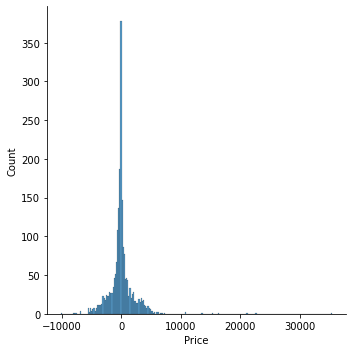

In [42]:
sns.displot(y_test-y_pred)

In [43]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,y_pred))
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2_Score",metrics.r2_score(y_test,y_pred))

MAE 1263.7165152701898
MSE 4842855.599713189
RMSE 2200.648904235564
r2_Score 0.7935976010823083


In [44]:
#Doing hyperparameter tunning
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
n_estimators = [i*200 for i in range(1,11)]
max_features = ['auto', 'sqrt']
max_depth = [x*10 for x in range(1,11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
para=rf_random.best_params_

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 59.3min finished


In [45]:
prediction=rf_random.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


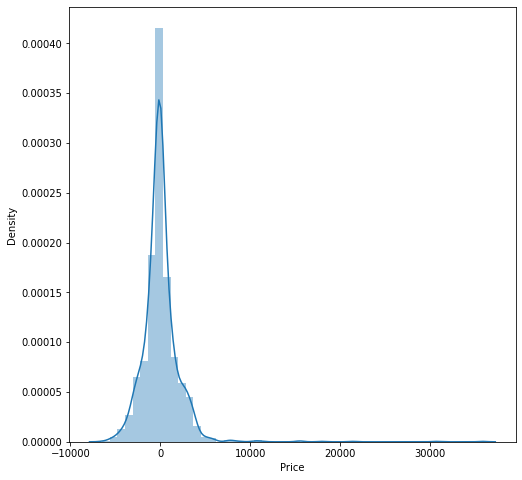

In [46]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

In [47]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,prediction))
print("MSE",metrics.mean_squared_error(y_test,prediction))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,prediction)))
print("r2_Score",metrics.r2_score(y_test,prediction))

MAE 1269.6552869877219
MSE 4680480.752786651
RMSE 2163.4418764521156
r2_Score 0.8005180134793897


In [48]:
#pickling the model
import pickle
pkl_file='flight_rf.pkl'
with open(pkl_file, 'wb') as file:
  pickle.dump(rf_random, file)


In [49]:
file.close()
!pip install flask_ngrok

In [50]:
import pickle
from flask import Flask,render_template,request,redirect,url_for
from flask_ngrok import run_with_ngrok


app = Flask(__name__, template_folder='/')
run_with_ngrok(app)  

model = pickle.load(open("/content/flight_rf.pkl", "rb"))



@app.route("/")
def home():
    return render_template("/content/index_flight.html")




@app.route("/predict", methods = ["GET", "POST"])
def predict():
    if request.method == "POST":

        # Date_of_Journey
        date_dep = request.form["Dep_Time"]
        Journey_day = int(pd.to_datetime(date_dep, format="%Y-%m-%dT%H:%M").day)
        Journey_month = int(pd.to_datetime(date_dep, format ="%Y-%m-%dT%H:%M").month)
        

        # Departure
        Dep_hour = int(pd.to_datetime(date_dep, format ="%Y-%m-%dT%H:%M").hour)
        Dep_min = int(pd.to_datetime(date_dep, format ="%Y-%m-%dT%H:%M").minute)
        

        # Arrival
        date_arr = request.form["Arrival_Time"]
        Arrival_hour = int(pd.to_datetime(date_arr, format ="%Y-%m-%dT%H:%M").hour)
        Arrival_min = int(pd.to_datetime(date_arr, format ="%Y-%m-%dT%H:%M").minute)
        

        # Duration
        dur_hour = abs(Arrival_hour - Dep_hour)
        dur_min = abs(Arrival_min - Dep_min)
        

        # Total Stops
        Total_stops = int(request.form["stops"])
        

        # Airline
        # AIR ASIA = 0 (not in column)
        airline=request.form['airline']
        if(airline=='Jet Airways'):
            Jet_Airways = 1
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 

        elif (airline=='IndiGo'):
            Jet_Airways = 0
            IndiGo = 1
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 

        elif (airline=='Air India'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 1
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
        elif (airline=='Multiple carriers'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 1
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
        elif (airline=='SpiceJet'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 1
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0 
            
        elif (airline=='Vistara'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 1
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='GoAir'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 1
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='Multiple carriers Premium economy'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 1
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='Jet Airways Business'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 1
            Vistara_Premium_economy = 0
            Trujet = 0

        elif (airline=='Vistara Premium economy'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 1
            Trujet = 0
            
        elif (airline=='Trujet'):
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 1

        else:
            Jet_Airways = 0
            IndiGo = 0
            Air_India = 0
            Multiple_carriers = 0
            SpiceJet = 0
            Vistara = 0
            GoAir = 0
            Multiple_carriers_Premium_economy = 0
            Jet_Airways_Business = 0
            Vistara_Premium_economy = 0
            Trujet = 0

        # Source
        # Banglore = 0 (not in column)
        Source = request.form["Source"]
        if (Source == 'Delhi'):
            s_Delhi = 1
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 0

        elif (Source == 'Kolkata'):
            s_Delhi = 0
            s_Kolkata = 1
            s_Mumbai = 0
            s_Chennai = 0

        elif (Source == 'Mumbai'):
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 1
            s_Chennai = 0

        elif (Source == 'Chennai'):
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 1

        else:
            s_Delhi = 0
            s_Kolkata = 0
            s_Mumbai = 0
            s_Chennai = 0

        Source = request.form["Destination"]
        if (Source == 'Cochin'):
            d_Cochin = 1
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0
        
        elif (Source == 'Delhi'):
            d_Cochin = 0
            d_Delhi = 1
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0

        elif (Source == 'New_Delhi'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 1
            d_Hyderabad = 0
            d_Kolkata = 0

        elif (Source == 'Hyderabad'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 1
            d_Kolkata = 0

        elif (Source == 'Kolkata'):
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 1

        else:
            d_Cochin = 0
            d_Delhi = 0
            d_New_Delhi = 0
            d_Hyderabad = 0
            d_Kolkata = 0


    # columns data representation for input    
    # ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
    #    'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
    #    'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
    #    'Airline_Jet Airways', 'Airline_Jet Airways Business',
    #    'Airline_Multiple carriers',
    #    'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
    #    'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
    #    'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
    #    'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
    #    'Destination_Kolkata', 'Destination_New Delhi']
        
        prediction=model.predict([[
            Total_stops,
            Journey_day,
            Journey_month,
            Dep_hour,
            Dep_min,
            Arrival_hour,
            Arrival_min,
            dur_hour,
            dur_min,
            Air_India,
            GoAir,
            IndiGo,
            Jet_Airways,
            Jet_Airways_Business,
            Multiple_carriers,
            Multiple_carriers_Premium_economy,
            SpiceJet,
            Trujet,
            Vistara,
            Vistara_Premium_economy,
            s_Chennai,
            s_Delhi,
            s_Kolkata,
            s_Mumbai,
            d_Cochin,
            d_Delhi,
            d_Hyderabad,
            d_Kolkata,
            d_New_Delhi
        ]])

        output=round(prediction[0],2)

        return render_template('/content/index_flight.html',prediction_text="Your Flight price is Rs. {}".format(output))


    return render_template("/content/index_flight.html")



app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://910d45377225.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [28/May/2021 10:13:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 10:13:23] "GET /static/css/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [28/May/2021 10:13:26] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [28/May/2021 10:14:06] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2021 10:14:06] "GET /static/css/styles.css HTTP/1.1" 404 -
